In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [243]:
df = pd.read_csv('/root/Desktop/VehicleInsuranceData.csv')

In [244]:
df.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [245]:
df['Gender'].value_counts()

F    4390
M    4240
Name: Gender, dtype: int64

In [246]:
df.isnull().sum()

Unnamed: 0                       0
clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8630.0,4560.576825,2637.448711,1.000000,2280.250000,4547.500000,6852.75000,9134.000000
clv,8630.0,6725.281515,3934.876313,1898.007675,3858.177183,5569.220419,8456.40853,21235.445570
Income,8630.0,37586.405794,30453.838594,0.000000,0.000000,33817.000000,62250.75000,99981.000000
Monthly.Premium.Auto,8630.0,91.677057,32.648209,61.000000,68.000000,81.000000,108.00000,298.000000
Months.Since.Last.Claim,8630.0,15.084473,10.048979,0.000000,6.000000,14.000000,23.00000,35.000000
Months.Since.Policy.Inception,8630.0,48.004287,27.880693,0.000000,24.000000,48.000000,71.00000,99.000000
Number.of.Open.Complaints,8630.0,0.389108,0.920491,0.000000,0.000000,0.000000,0.00000,5.000000
Number.of.Policies,8630.0,3.020626,2.445994,1.000000,1.000000,2.000000,4.00000,9.000000
Total.Claim.Amount,8630.0,427.131607,282.722326,0.099007,268.881398,376.880363,542.40000,2893.239678


In [248]:
df.columns

Index(['Unnamed: 0', 'clv', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

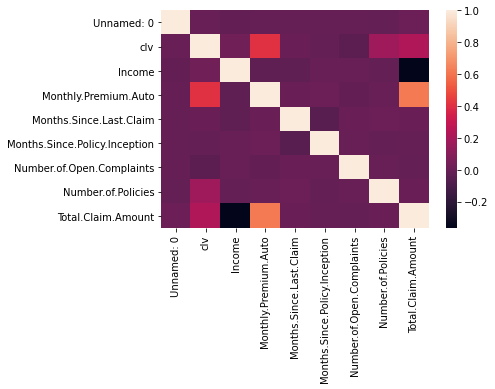

In [249]:
sns.heatmap(df.corr())
plt.show()

In [250]:
df.dtypes

Unnamed: 0                         int64
clv                              float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto               int64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                      object
dtype: object

In [251]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [252]:
df.dtypes

Unnamed: 0                         int64
clv                              float64
Response                           int64
Coverage                           int64
Education                          int64
EmploymentStatus                   int64
Gender                             int64
Income                             int64
Location.Code                      int64
Marital.Status                     int64
Monthly.Premium.Auto               int64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                        int64
Policy                             int64
Renew.Offer.Type                   int64
Sales.Channel                      int64
Total.Claim.Amount               float64
Vehicle.Class                      int64
Vehicle.Size                       int64
dtype: object

In [253]:
df['clv'] = df['clv'].astype(np.int64)

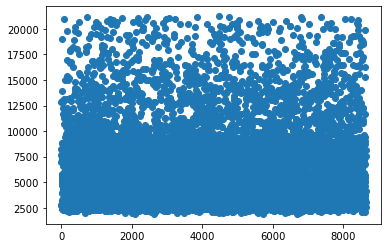

In [254]:
plt.scatter(df.index, df['clv'])

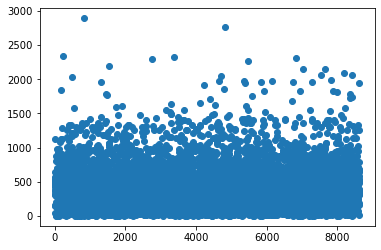

In [255]:
plt.scatter(df.index, df['Total.Claim.Amount'])

In [256]:
li = list(df['Total.Claim.Amount'].sort_values()[-10:].index)

In [257]:
df['Total.Claim.Amount'][li] = int(df.drop(li)['Total.Claim.Amount'].mean())

<ipython-input-257-6dd49a16edb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total.Claim.Amount'][li] = int(df.drop(li)['Total.Claim.Amount'].mean())


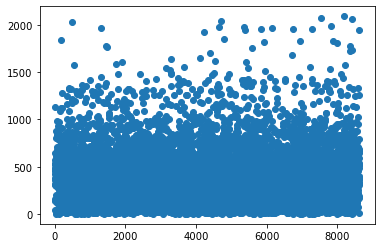

In [258]:
plt.scatter(df.index, df['Total.Claim.Amount'])

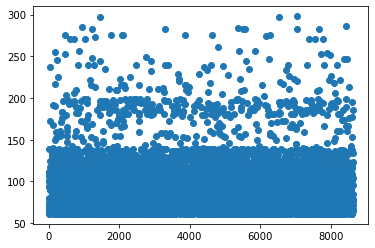

In [259]:
plt.scatter(df.index, df['Monthly.Premium.Auto'])

In [260]:
li = list(df['Monthly.Premium.Auto'].sort_values()[-5:].index)

In [261]:
df['Monthly.Premium.Auto'][li] = int(df.drop(li)['Monthly.Premium.Auto'].mean())

<ipython-input-261-acd671872a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly.Premium.Auto'][li] = int(df.drop(li)['Monthly.Premium.Auto'].mean())


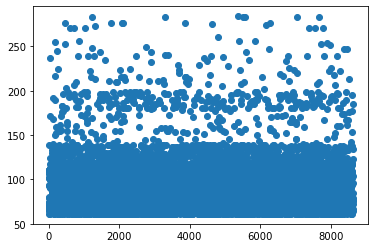

In [262]:
plt.scatter(df.index, df['Monthly.Premium.Auto'])

In [263]:
X = df.drop(['clv'], axis=1)
y = df['clv']

In [264]:
df.values.shape

(8630, 22)

In [265]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).sort_values()

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Number.of.Open.Complaints         1.003472
Unnamed: 0                        1.003770
Months.Since.Last.Claim           1.006137
Education                         1.008126
Number.of.Policies                1.011417
Months.Since.Policy.Inception     1.013388
Gender                            1.015252
Vehicle.Size                      1.018680
Sales.Channel                     1.027750
Vehicle.Class                     1.049528
Response                          1.051658
Renew.Offer.Type                  1.100047
Marital.Status                    1.149852
Location.Code                     1.156593
Coverage                          1.291893
Monthly.Premium.Auto              2.159340
Income                            2.273465
EmploymentStatus                  2.289522
Total.Claim.Amount                2.397374
Policy.Type                       4.429375
Policy                            4.429568
const                            53.962576
dtype: float64

In [266]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100

Significance.sort_values()

const                              0.000000
Policy                            58.581700
Unnamed: 0                        70.929814
Policy.Type                       82.915418
Gender                           100.000000
Total.Claim.Amount               100.000000
Sales.Channel                    100.000000
Renew.Offer.Type                 100.000000
Number.of.Policies               100.000000
Number.of.Open.Complaints        100.000000
Months.Since.Policy.Inception    100.000000
Monthly.Premium.Auto             100.000000
Vehicle.Class                    100.000000
Marital.Status                   100.000000
Location.Code                    100.000000
Income                           100.000000
EmploymentStatus                 100.000000
Education                        100.000000
Coverage                         100.000000
Response                         100.000000
Months.Since.Last.Claim          100.000000
Vehicle.Size                     100.000000
dtype: float64

In [267]:
X_ = X[Significance[Significance >= 99.9].index]

In [268]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(X_) 
scaled_data = scalar.transform(X_) 

In [269]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [271]:
log.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/logistic.py:467: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  warnings.warn("Default multi_class will be changed to 'auto' in"
/usr/local/lib/python3.8/dist-packages/sklearn/svm/base.py:928: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
pred = log.predict(X_test)
pred

array([8879, 2230, 7610, ..., 2790, 5450, 4605])

In [273]:
log.score(X_test, pred)

1.0

In [274]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [275]:
accuracy_score(y_test,pred)*100

12.289325842696629

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
X = df.drop(['clv'], axis=1)
y = df['clv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [ ]:
model = SVC()
model.fit(X_train,y_train)
pred= model.predict(X_test)

In [ ]:
print(classification_report(y_test,pred)) 

In [ ]:
print("(in %):",accuracy_score(y_test, pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
X = df.drop(['clv'], axis=1)
y = df['clv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [ ]:
gnb = GaussianNB() 

In [ ]:
gnb.fit(X_train, y_train) 

In [ ]:
pred2 = gnb.predict(X_test)
pred2

In [ ]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, pred2)*100)